In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
data_gen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [10]:
train_path = r"C:\Users\dell\Desktop\gahlyan\neural networks\dataset\training_set"
test_path= r"C:\Users\dell\Desktop\gahlyan\neural networks\dataset\test_set"

In [11]:
training_set=data_gen.flow_from_directory(train_path,target_size=(64,64),class_mode="binary",batch_size=32)
test_set=data_gen.flow_from_directory(test_path,target_size=(64,64),class_mode="binary",batch_size=32)

Found 8000 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [20]:
image_data=next(training_set)
image_data[0].shape

(32, 64, 64, 3)

1.0

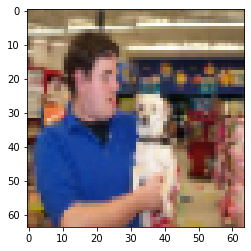

In [18]:
import matplotlib.pyplot as plt 

imag_num=2
plt.imshow(image_data[0][imag_num])
image_data[1][imag_num]


In [23]:
model=Sequential()
# first convolution layer 

model.add(Conv2D(36,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D())
#convolution layer 2
model.add(Conv2D(72,(3,3),activation='relu'))
model.add(MaxPool2D())


model.add(Flatten())



In [24]:
# add ANN layer (FCL)
model.add(Dense(128,activation='relu'))   # hidden layer 1
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))  # hidden layer 2
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))    # hidden layer 3
model.add(Dropout(0.1)) 
model.add(Dense(1,activation='sigmoid'))  # output layer    we use sigmoid as output are binary 

In [25]:
model.compile('adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=25  )

Epoch 1/25
250/250 [==============================] - 111s 439ms/step - loss: 0.6905 - accuracy: 0.5332
Epoch 2/25
250/250 [==============================] - 65s 260ms/step - loss: 0.6391 - accuracy: 0.6407
Epoch 3/25
250/250 [==============================] - 59s 234ms/step - loss: 0.5978 - accuracy: 0.6817
Epoch 4/25
250/250 [==============================] - 60s 241ms/step - loss: 0.5627 - accuracy: 0.7099
Epoch 5/25
250/250 [==============================] - 79s 314ms/step - loss: 0.5240 - accuracy: 0.7385
Epoch 6/25
250/250 [==============================] - 61s 242ms/step - loss: 0.4987 - accuracy: 0.7586
Epoch 7/25
250/250 [==============================] - 79s 315ms/step - loss: 0.4838 - accuracy: 0.7620
Epoch 8/25
250/250 [==============================] - 71s 281ms/step - loss: 0.4634 - accuracy: 0.7789
Epoch 9/25
250/250 [==============================] - 89s 356ms/step - loss: 0.4434 - accuracy: 0.7878
Epoch 10/25
250/250 [==============================] - 79s 316ms/step - 

In [26]:
model.fit(test_set,epochs=25 )

Epoch 1/25
63/63 [==============================] - 31s 493ms/step - loss: 0.4782 - accuracy: 0.7854
Epoch 2/25
63/63 [==============================] - 19s 302ms/step - loss: 0.4312 - accuracy: 0.8109
Epoch 3/25
63/63 [==============================] - 18s 290ms/step - loss: 0.4150 - accuracy: 0.8219
Epoch 4/25
63/63 [==============================] - 18s 291ms/step - loss: 0.3891 - accuracy: 0.8299
Epoch 5/25
63/63 [==============================] - 19s 296ms/step - loss: 0.3728 - accuracy: 0.8339
Epoch 6/25
63/63 [==============================] - 21s 321ms/step - loss: 0.3535 - accuracy: 0.8454
Epoch 7/25
63/63 [==============================] - 19s 300ms/step - loss: 0.3499 - accuracy: 0.8544
Epoch 8/25
63/63 [==============================] - 15s 241ms/step - loss: 0.3156 - accuracy: 0.8729
Epoch 9/25
63/63 [==============================] - 18s 292ms/step - loss: 0.3141 - accuracy: 0.8684
Epoch 10/25
63/63 [==============================] - 19s 301ms/step - loss: 0.2664 - accura

In [27]:
# saving the model


model.save(r"C:\Users\dell\Desktop\gahlyan\neural networks\Catanddog.h5")

In [1]:
# load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model_pd =load_model(r"C:\Users\dell\Desktop\gahlyan\neural networks\Catanddog.h5")

1/1 [==============================] - 0s 109ms/step
Cat 


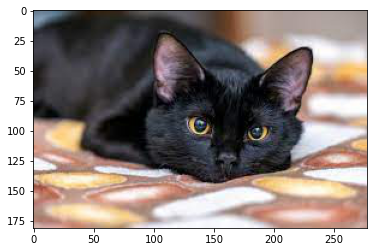

In [14]:
 #loading the image from the path
testing_data = r"C:\Users\dell\Desktop\gahlyan\neural networks\dataset\single_prediction\cat_or_dog_4.jpg"
# displaying the image 
import matplotlib.pyplot as plt
test_image=plt.imread(testing_data)
plt.imshow(test_image)

# predicting the class of image 
test_image = image.load_img(testing_data, target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image , axis=0)
result = model_pd.predict(test_image)
if result[0][0] == 1:
  print('Dog')
else:
  print('Cat ')
